In [1]:
# bibliotecas a serem utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import poisson,skellam
from tqdm.notebook import tqdm_notebook
plt.style.use('ggplot')

# endereço do arquivo base
caminho = r'C:\Users\david\OneDrive\DIVERSOS\ESTATÍSTICA BÁSICA\ESTATÍSTICA E FUTEBOL\PLANILHAS\brasileirao-pequena-simulacao.xlsx'

# abrir a pasta de trabalho do Excel
xls = pd.ExcelFile(caminho)

# guardar a planilha da aba 2020 no dataframe df_20
df_20 = pd.read_excel(xls, sheet_name='2020')

# guardar a planilha da aba 2020 no dataframe df_21
df_21 = pd.read_excel(xls, sheet_name='2021-com-criterios')

## 1. Média de gols feitos e sofridos pelas equipes no campeonato do ano anterior.

In [2]:
# GFM = MÉDIA DE GOLS FEITOS PELO(S) MANDANTE(S)
# GSM = MÉDIA DE GOLS SOFRIDOS PELO(S) MANDANTE(S)
# GFV = MÉDIA DE GOLS FEITO(S) PELO(S) VISITANTE(S) = GSM
# GSV = MÉDIA DE GOLS SOFRIDO(S) PELO(S) VISITANTE(S) = GFM


# GFM DE TODOS OS MANDANTES DE 2020
GFM_20 = round(df_20['Gol Mandante'].mean(), 2)

# GSM DE TODOS OS MANDANTES DE 2020
GSM_20 = round(df_20['Gol Visitante'].mean(), 2)

# GFV DE TODOS OS VISTITANTES DE 2020
GFV_20 = GSM_20

# GSV DE TODOS OS VISITANTES DE 2020
GSV_20 = GFM_20

[GFM_20, GFV_20]

[1.41, 1.07]

## 5 .SIMULAÇÃO DE VÁRIOS CAMPEONATOS

In [3]:
equipes = sorted(list(df_21['Mandante'].unique()), reverse=False)

# Rodadas Realizadas
colunas = ['Rodada', 'Mandante', 'Gol Mandante', 'Gol Visitante', 
           'Visitante', 'Pontos Mandante', 'Pontos Visitante',
          'Vitória Mandante', 'Vitória Visitante']
# colunas1 = ['Rodada', 'Mandante', 'Gol Mandante', 'Gol Visitante', 'Visitante', 'Pts Mandante', 'Pts Visitante']
colunas2 = ['equipe', 'pontuação', 'vitórias', 'gols pró', 'saldo de gols']
# rodada1 = [[1, 'INTERNACIONAL', 2, 2, 'SPORT', 1, 1],[1, 'CEARA', 3, 2, 'GREMIO', 3, 0],
#           [2, 'SPORT', 1, 0, 'GREMIO', 3, 0],[2, 'CEARA', 1, 1, 'INTERNACIONAL', 1, 1]]

df_realizadas = df_21[df_21['Gol Mandante'] != ' '].reset_index(drop=True)

In [4]:
# equipes

In [5]:
df_realizadas

,Rodada,Mandante,Gol Mandante,Gol Visitante,Visitante,Pontos Mandante,Pontos Visitante,Vitória Mandante,Vitória Visitante
0,1,FLAMENGO,1,0,PALMEIRAS,3,0,1,0
1,1,CORINTHIANS,0,1,ATLETICO,0,3,0,1
2,1,SAO PAULO,0,0,FLUMINENSE,1,1,0,0
3,1,ATLETICO MINEIRO,1,2,FORTALEZA,0,3,0,1
4,1,INTERNACIONAL,2,2,SPORT,1,1,0,0
...,...,...,...,...,...,...,...,...,...
323,33,SPORT,1,0,BAHIA,3,0,1,0
324,33,ATHLETICO PARANAENSE,0,1,ATLETICO MINEIRO,0,3,0,1
325,33,JUVENTUDE,1,0,FLUMINENSE,3,0,1,0
326,33,CUIABA,1,0,INTERNACIONAL,3,0,1,0


In [6]:
rodada1 = []
for i in tqdm_notebook(np.arange(0, df_realizadas.shape[0], 1)):
    rodada1.append(list(df_realizadas.iloc[i]))

  0%|          | 0/328 [00:00<?, ?it/s]

In [7]:
df_futuras = df_21[df_21['Gol Mandante'] == ' '].reset_index(drop=True)
del df_futuras['Gol Mandante']
del df_futuras['Gol Visitante']
del df_futuras['Pontos Mandante']
del df_futuras['Pontos Visitante']
del df_futuras['Vitória Mandante']
del df_futuras['Vitória Visitante']
df_futuras

,Rodada,Mandante,Visitante
0,2,GREMIO,FLAMENGO
1,30,ATLETICO,JUVENTUDE
2,32,BAHIA,ATLETICO MINEIRO
3,34,FLUMINENSE,AMERICA
4,34,CORINTHIANS,SANTOS
5,34,SAO PAULO,ATHLETICO PARANAENSE
6,34,ATLETICO MINEIRO,JUVENTUDE
7,34,INTERNACIONAL,FLAMENGO
8,34,FORTALEZA,PALMEIRAS
9,34,BAHIA,CUIABA


In [8]:
# número de gols marcados por time
k = np.arange(0, 6, 1)

simulacao = pd.DataFrame()

for j in tqdm_notebook(np.arange(5000)):
    rodadas = [list(df_futuras.iloc[i]) for i in np.arange(0, df_futuras.shape[0], 1)]
    df = pd.DataFrame(rodada1, columns=colunas)
    for i in rodadas:
        GP_0 = df_realizadas[df_realizadas['Mandante'] == i[0]]['Gol Mandante'].sum() #gols marcados pelo mandante
        GC_0 = df_realizadas[df_realizadas['Mandante'] == i[0]]['Gol Visitante'].sum() #gols sofridos pelo mandante
        # Cálculo do vetor mandante (GFM, GSM)
        GFM = round(sum([GFM_20, GP_0])/(df_realizadas[df_realizadas['Mandante'] == i[0]].shape[0] + 1), 2)
        GSM = round(sum([GSM_20, GC_0])/(df_realizadas[df_realizadas['Mandante'] == i[0]].shape[0] + 1), 2)
        GP_1 = df_realizadas[df_realizadas['Visitante'] == i[1]]['Gol Visitante'].sum() #gols marcados pelo visitante
        GC_1 = df_realizadas[df_realizadas['Visitante'] == i[1]]['Gol Mandante'].sum() #gols sofridos pelo visitante
        # Cálculo do vetor visitante (GFV, GSV)
        GFV = round(sum([GFV_20, GP_1])/(df_realizadas[df_realizadas['Visitante'] == i[1]].shape[0] + 1), 2)
        GSV = round(sum([GSV_20, GC_1])/(df_realizadas[df_realizadas['Visitante'] == i[1]].shape[0] + 1), 2)
        # vetor do jogo
        vetor_jogo = [(GFM + GSV)/2 , (GFV + GSM)/2]
        pm = np.asarray([format(i, '.3f') for i in poisson.pmf(k, vetor_jogo[0])], dtype=float) #Distribuição Poisson gols mandante
        pv = np.asarray([format(i, '.3f') for i in poisson.pmf(k, vetor_jogo[1])], dtype=float) #Distribuição Poisson gols visitante
        cdfm = np.cumsum(pm) #distribuição acumulada mandante
        cdfv = np.cumsum(pv) #distribuição acumulada visitante
        x = np.random.rand() #número aletatório para o mandante
        y = np.random.rand() #número aletatório para o visitante
        if (x >=0 and x <= cdfm[0]):
            golmandante = 0
        elif (x > cdfm[0] and x <= cdfm[1]):
            golmandante = 1
        elif (x > cdfm[1] and x <= cdfm[2]):
            golmandante = 2
        elif (x > cdfm[2] and x <= cdfm[3]):
            golmandante = 3
        elif (x > cdfm[3] and x <= cdfm[4]):
            golmandante = 4
        elif (x > cdfm[4] and x <= cdfm[5]):
            golmandante = 5
        if (y >=0 and y <= cdfv[0]):
            golvisitante = 0
        elif (y > cdfv[0] and y <= cdfv[1]):
            golvisitante = 1
        elif (y > cdfv[1] and y <= cdfv[2]):
            golvisitante = 2
        elif (y > cdfv[2] and y <= cdfv[3]):
            golvisitante = 3
        elif (y > cdfv[3] and y <= cdfv[4]):
            golvisitante = 4
        elif (y > cdfv[4] and y <= cdfv[5]):
            golvisitante = 5
        i.insert(2, golmandante) #acrescentar o gol do mandante na posição 1
        i.insert(3, golvisitante)#acrescentar o gol do visitante na posição 2
        if i[2] > i[3]:
            i.extend([3, 0, 1, 0])
        elif i[2] == i[3]:
            i.extend([1, 1, 0, 0])
        else:
            i.extend([0, 3, 0, 1])
    df1 = pd.concat([df_realizadas, pd.DataFrame(rodadas, columns=colunas)])
#     print(rodadas)
        
    #gerar classificação do campeonato
    classificacao = [[time, 
                      sum([df1[df1['Mandante'] == time]['Pontos Mandante'].sum(), 
                          df1[df1['Visitante'] == time]['Pontos Visitante'].sum()]),
                      sum([df1[df1['Mandante'] == time]['Vitória Mandante'].sum(), 
                          df1[df1['Visitante'] == time]['Vitória Visitante'].sum()]),
                     sum([df1[df1['Mandante'] == time]['Gol Mandante'].sum(), 
                          df1[df1['Visitante'] == time]['Gol Visitante'].sum()]),
                     sum([df1[df1['Mandante'] == time]['Gol Mandante'].sum(), 
                          df1[df1['Visitante'] == time]['Gol Visitante'].sum()])-sum([df1[df1['Mandante'] == time]['Gol Visitante'].sum(), 
                          df1[df1['Visitante'] == time]['Gol Mandante'].sum()])] for time in equipes]
#     classificacao = sorted(classificacao, key=lambda x:x[1], reverse=True)
#     classificacao2 = [[k+1, classificacao[k][0], int(classificacao[k][1])] for k in np.arange(len(classificacao))]
    tabela = pd.DataFrame(classificacao, columns=colunas2)
    tabela = tabela.sort_values(['pontuação', 'vitórias','saldo de gols', 'gols pró'], ascending=False).reset_index(drop=True)
    tabela.insert(0, 'posição', list(np.arange(1, 21, 1)))
    simulacao = simulacao.append(tabela)
#     simulacao = simulacao0.sort_values(['pontuação', 'saldo de gols', 'gols pró'], ascending=False, inplace=True)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [9]:
simulacao

,posição,equipe,pontuação,vitórias,gols pró,saldo de gols
0,1,ATLETICO MINEIRO,74,22,57,24
1,2,PALMEIRAS,67,20,59,17
2,3,FLAMENGO,67,19,68,31
3,4,CORINTHIANS,64,17,48,13
4,5,INTERNACIONAL,59,16,50,12
...,...,...,...,...,...,...
15,16,JUVENTUDE,45,10,39,-7
16,17,SAO PAULO,43,9,27,-11
17,18,SPORT,38,9,27,-11
18,19,GREMIO,36,9,32,-18


In [10]:
# simulacao2 = pd.DataFrame(columns=list(simulacao.equipe))
# simulacao2

## ANÁLISES SPORT CLUB DO RECIFE

In [39]:
%%time
simulacao_individual = simulacao[simulacao['equipe'] == 'SPORT']
simulacao_individual

Wall time: 17.4 ms


,posição,equipe,pontuação,vitórias,gols pró,saldo de gols
18,19,SPORT,34,8,26,-16
17,18,SPORT,42,11,25,-14
17,18,SPORT,36,8,27,-13
18,19,SPORT,36,8,26,-14
17,18,SPORT,42,11,28,-9
...,...,...,...,...,...,...
18,19,SPORT,37,9,28,-11
18,19,SPORT,36,9,24,-13
18,19,SPORT,35,8,22,-14
18,19,SPORT,35,8,29,-11


In [40]:
pontuacao_individual, chances_pts_fn = np.unique(simulacao_individual['pontuação'], return_counts=True)
chances_pts_fr = [round(j/sum(chances_pts_fn), 4) for j in chances_pts_fn]
df_pontuacao = pd.DataFrame({'PONTUAÇÃO':pontuacao_individual, 'CHANCE':chances_pts_fr})
df_pontuacao.sort_values('CHANCE', ascending=False).reset_index(drop=True)

,PONTUAÇÃO,CHANCE
0,37,0.1580
1,39,0.1175
2,36,0.1125
3,38,0.1110
4,40,0.1075
5,35,0.1065
6,34,0.0820
7,33,0.0475
8,41,0.0425
9,42,0.0330


Text(0.5, 0, 'Pontos')

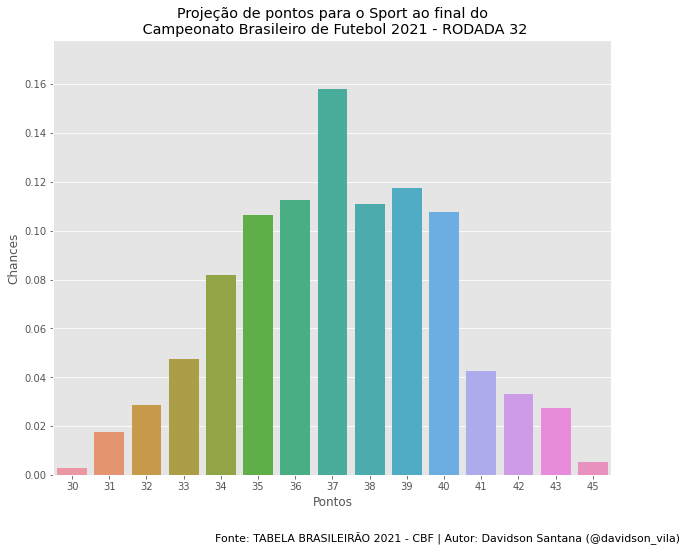

In [59]:
plt.figure(figsize=(10,8))
h = sns.barplot(x=df_pontuacao['PONTUAÇÃO'], y=df_pontuacao['CHANCE'])
plt.ylabel('Chances')
plt.ylim(0, df_pontuacao['CHANCE'].max() + 0.02)
plt.title('Projeção de pontos para o Sport ao final do\n Campeonato Brasileiro de Futebol 2021 - RODADA 32')
plt.figtext(0.35, 0.009,'Fonte: TABELA BRASILEIRÃO 2021 - CBF | Autor: Davidson Santana (@davidson_vila)', fontsize=11)
plt.xlabel('Pontos')
# plt.savefig('./IMAGENS/rodada-32-projecao-pontos-sport-2021.png', format='png')

In [44]:
%%time
# posicao_individual = simulacao_individual['posição'].value_counts(ascending=False)
# chances = round(posicao_individual/len(simulacao_individual['posição']), 3)

posicao_individual, chances_fn = np.unique(simulacao_individual['posição'], return_counts=True)

Wall time: 1.99 ms


In [45]:
chances_fr = [round(i/sum(chances_fn), 4) for i in chances_fn]
chances_time = pd.DataFrame({'POSIÇÃO':posicao_individual, 'CHANCE':chances_fr})

In [46]:
%%time
chances_time.set_index('POSIÇÃO', drop=True)

Wall time: 9.9 ms


,CHANCE
POSIÇÃO,
13,0.0005
14,0.0010
15,0.0030
16,0.0130
17,0.0460
18,0.2590
19,0.6775


In [47]:
round(chances_time.loc[chances_time['POSIÇÃO']>16]['CHANCE'].sum(), 4)

0.9825

In [48]:
# plt.figure(figsize=(10,8))
# sns.barplot(x=chances_time['POSIÇÃO'], y=chances_time['CHANCE'])
# plt.yticks(np.arange(0, chances.max() + 0.02, 0.025))

In [49]:
%%time
# pontuacao_individual = simulacao_individual['pontuação'].value_counts(ascending=False)
# pontos = round(pontuacao_individual/len(simulacao_individual['pontuação']), 3)

Wall time: 0 ns


In [50]:
%%time
pontuacao_individual, posicao_chances = np.unique(simulacao_individual['pontuação'], return_counts=True)
pontos_fr = [round(k/sum(posicao_chances), 3) for k in posicao_chances]
df_chances_pontuacao = pd.DataFrame({'PONTUAÇÃO':pontuacao_individual, 'CHANCE':pontos_fr})

Wall time: 7.91 ms


In [51]:
# df_chances_pontuacao

In [52]:
# plt.figure(figsize=(10,8))
# sns.barplot(y=df_chances_pontuacao['CHANCE'], x=df_chances_pontuacao['PONTUAÇÃO'])

## CHANCES DE REBAIXAMENTO

In [53]:
equipes1 = ['CUIABA', 'ATLETICO', 'FLUMINENSE', 'AMERICA', 
            'SAO PAULO', 'CEARA', 'JUVENTUDE', 'SANTOS', 
            'BAHIA', 'SPORT', 'GREMIO', 'CHAPECOENSE', 'ATHLETICO PARANAENSE']

rebaixamento =[]

for equipe in equipes1:
    a = simulacao[simulacao['equipe'] == equipe]
    a_posicao, a_chances_fn = np.unique(a['posição'], return_counts=True)
    a_chances_fr = [round(i/sum(a_chances_fn), 3) for i in a_chances_fn]
    b = pd.DataFrame({'POSIÇÃO':a_posicao, 'CHANCE':a_chances_fr})
    c = b.loc[b['POSIÇÃO']>16]['CHANCE'].sum()
    rebaixamento.append([equipe, c])

tabela_rebaixamento = pd.DataFrame(rebaixamento, columns = ['EQUIPE', 'CHANCE'])
tabela_rebaixamento.sort_values('CHANCE', ascending=False).reset_index(drop=True)

,EQUIPE,CHANCE
0,CHAPECOENSE,1.000
1,SPORT,0.983
2,GREMIO,0.883
3,JUVENTUDE,0.296
4,SAO PAULO,0.221
5,BAHIA,0.206
6,CUIABA,0.185
7,ATLETICO,0.109
8,SANTOS,0.077
9,ATHLETICO PARANAENSE,0.026


## CHANCES DE LIBERTADORES (FASE DE GRUPOS)

In [25]:
equipes4 = ['ATLETICO MINEIRO', 'FLAMENGO', 'FORTALEZA', 
            'RED BULL BRAGANTINO', 'PALMEIRAS', 'CORINTHIANS', 
            'INTERNACIONAL', 'ATHLETICO PARANAENSE', 'CUIABA', 'ATLETICO', 'FLUMINENSE', 'AMERICA', 
            'SAO PAULO', 'CEARA', 'JUVENTUDE', 'SANTOS', 
            'BAHIA', 'SPORT', 'GREMIO', 'CHAPECOENSE']

libertadores =[]

for equipe in equipes4:
    x = simulacao[simulacao['equipe'] == equipe]
    x_posicao, x_chances_fn = np.unique(x['posição'], return_counts=True)
    x_chances_fr = [round(i/sum(x_chances_fn), 3) for i in x_chances_fn]
    y = pd.DataFrame({'POSIÇÃO':x_posicao, 'CHANCE':x_chances_fr})
    z = y.loc[y['POSIÇÃO']<5]['CHANCE'].sum()
    libertadores.append([equipe, z])

tabela_libertadores = pd.DataFrame(libertadores, columns = ['EQUIPE', 'CHANCE'])
tabela_libertadores.sort_values('CHANCE', ascending=False).reset_index(drop=True)

,EQUIPE,CHANCE
0,ATLETICO MINEIRO,1.000
1,FLAMENGO,0.998
2,PALMEIRAS,0.988
3,CORINTHIANS,0.318
4,FORTALEZA,0.288
5,RED BULL BRAGANTINO,0.256
6,INTERNACIONAL,0.102
7,AMERICA,0.022
8,FLUMINENSE,0.014
9,CEARA,0.010


## CHANCES DE TÍTULO

In [26]:
equipes2 = ['ATLETICO MINEIRO', 'FLAMENGO', 'FORTALEZA', 
            'RED BULL BRAGANTINO', 'PALMEIRAS', 'CORINTHIANS', 
            'INTERNACIONAL', 'ATHLETICO PARANAENSE']

titulo =[]

for equipe in equipes2:
    d = simulacao[simulacao['equipe'] == equipe]
    d_posicao, d_chances_fn = np.unique(d['posição'], return_counts=True)
    d_chances_fr = [round(i/sum(d_chances_fn), 4) for i in d_chances_fn]
    e = pd.DataFrame({'POSIÇÃO':d_posicao, 'CHANCE':d_chances_fr})
    f = e.loc[e['POSIÇÃO']<2]['CHANCE'].sum()
    titulo.append([equipe, f])

tabela_titulo = pd.DataFrame(titulo, columns = ['EQUIPE', 'CHANCE'])
tabela_titulo.sort_values('CHANCE', ascending=False).reset_index(drop=True)

,EQUIPE,CHANCE
0,ATLETICO MINEIRO,0.958
1,FLAMENGO,0.028
2,PALMEIRAS,0.014
3,FORTALEZA,0.000
4,RED BULL BRAGANTINO,0.000
5,CORINTHIANS,0.000
6,INTERNACIONAL,0.000
7,ATHLETICO PARANAENSE,0.000


## CHANCES DE SULAMERICANA

In [27]:
equipes3 = ['CUIABA', 'ATLETICO', 'FLUMINENSE', 'AMERICA', 
            'SAO PAULO', 'CEARA', 'JUVENTUDE', 'SANTOS', 
            'BAHIA', 'SPORT', 'GREMIO', 'CHAPECOENSE', 'CORINTHIANS', 
            'INTERNACIONAL', 'ATHLETICO PARANAENSE']

sulamericana =[]

for equipe in equipes3:
    g = simulacao[simulacao['equipe'] == equipe]
    g_posicao, g_chances_fn = np.unique(g['posição'], return_counts=True)
    g_chances_fr = [round(k/sum(g_chances_fn), 3) for k in g_chances_fn]
    h = pd.DataFrame({'POSIÇÃO':g_posicao, 'CHANCE':g_chances_fr})
    i = h.loc[(h['POSIÇÃO']>=7) & (h['POSIÇÃO']<=12)]['CHANCE'].sum()
    sulamericana.append([equipe, i])

tabela_sulamericana = pd.DataFrame(sulamericana, columns = ['EQUIPE', 'CHANCE'])
tabela_sulamericana.sort_values('CHANCE', ascending=False).reset_index(drop=True)

,EQUIPE,CHANCE
0,AMERICA,0.768
1,FLUMINENSE,0.742
2,CEARA,0.656
3,INTERNACIONAL,0.612
4,ATHLETICO PARANAENSE,0.598
5,ATLETICO,0.434
6,SANTOS,0.434
7,BAHIA,0.296
8,CORINTHIANS,0.278
9,CUIABA,0.254


## ANÁLISES PARA O 16º COLOCADO

In [28]:
simulacao_pontos = simulacao[simulacao['posição'] == 16]
pontuacao_individual = simulacao_pontos['pontuação'].value_counts()
chances_pontos = round(pontuacao_individual/len(simulacao_pontos),4)
chances_pontos

44    0.276
45    0.242
43    0.164
46    0.160
47    0.070
42    0.050
41    0.018
48    0.010
40    0.008
49    0.002
Name: pontuação, dtype: float64

Text(0.5, 0, 'Pontos')

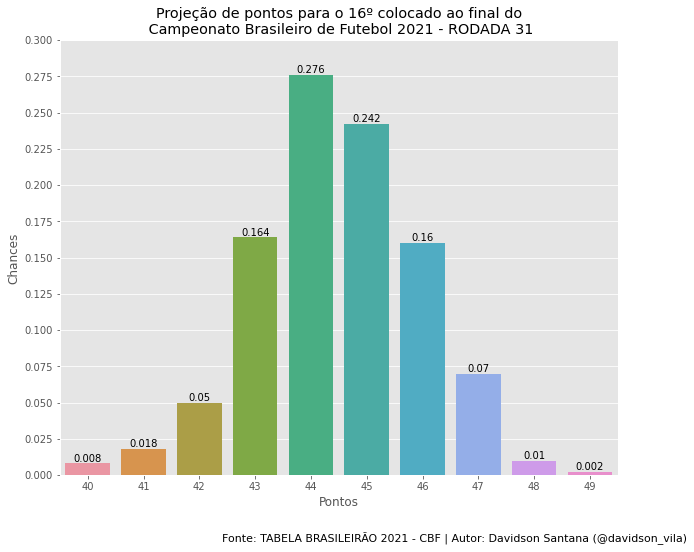

In [61]:
plt.figure(figsize=(10,8))
g1 = sns.barplot(x=chances_pontos.index, y=chances_pontos)
plt.ylabel('Chances')
plt.yticks(np.arange(0, chances_pontos.max()+0.03, 0.025))
# g1.annotate('25,5%', xy=(45, 0.2551), fontsize=14, xytext=(45, 0.2551))
plt.bar_label(g1.containers[0])
plt.title('Projeção de pontos para o 16º colocado ao final do\n Campeonato Brasileiro de Futebol 2021 - RODADA 31')
plt.figtext(0.35, 0.009,'Fonte: TABELA BRASILEIRÃO 2021 - CBF | Autor: Davidson Santana (@davidson_vila)', fontsize=11)
plt.xlabel('Pontos')
# plt.savefig('./IMAGENS/rodada-32-projecao-pontos-16-colocado-2021.png', format='png')

## ANÁLISES PARA O 1º COLOCADO

In [30]:
simulacao_campeao = simulacao[simulacao['posição'] == 1]
pontuacao_campeao = simulacao_campeao['pontuação'].value_counts()
chances_pontos_campeao = round(pontuacao_campeao/len(simulacao_campeao),4)
chances_pontos_campeao

75    0.146
76    0.116
79    0.108
78    0.108
77    0.092
74    0.088
73    0.070
72    0.056
80    0.050
81    0.048
71    0.040
82    0.022
83    0.016
84    0.016
85    0.010
70    0.006
86    0.004
69    0.004
Name: pontuação, dtype: float64

Text(0.5, 0, 'Pontos')

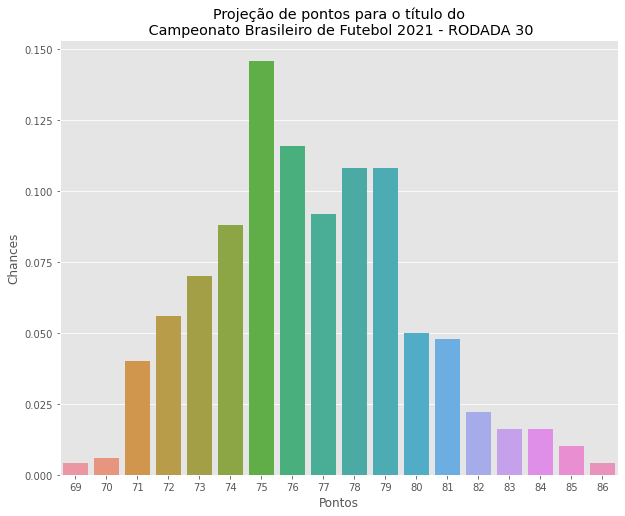

In [31]:
plt.figure(figsize=(10,8))
g2 = sns.barplot(x=chances_pontos_campeao.index, y=chances_pontos_campeao)
plt.ylabel('Chances')
plt.yticks(np.arange(0, chances_pontos_campeao.max()+0.025, 0.025))
plt.title('Projeção de pontos para o título do\n Campeonato Brasileiro de Futebol 2021 - RODADA 30')
plt.xlabel('Pontos')
# plt.savefig('./IMAGENS/rodada-32-projecao-pontos-campeao-2021.png', format='png')